In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("students_scores.csv")

In [4]:
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

DROP UNNAMED COLUMN


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


CHANGE WEEKLYSTUDY HOURS COLUMNS 

In [7]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


REMOVE DUPLICATES

In [8]:
df.drop_duplicates(inplace=True)

REMOVE NULL VALUES

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

GENDER DISTRIBUTION


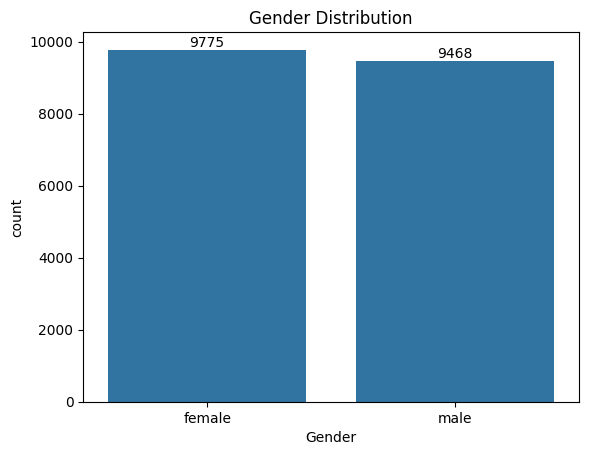

<Figure size 500x500 with 0 Axes>

In [35]:
ax=sns.countplot(data=df,x="Gender")
plt.title("Gender Distribution")
plt.figure(figsize=(5,5))
ax.bar_label(ax.containers[0])
plt.show()

STUDENTS PERFORMANCE BASED ON PARENT EDUCATION AND STUDYING HOURS

In [37]:
gb=df.groupby("ParentEduc").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.541478,71.317685,70.551080
bachelor's degree,70.724379,73.560401,73.873964
high school,64.294461,67.284124,65.495892
master's degree,72.293680,75.922677,76.423792
some college,66.578305,69.300113,68.651525
some high school,62.522417,65.438218,63.572171


In [38]:
gb1=df.groupby("WklyStudyHours").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5-10,66.957425,69.775598,68.793123
< 5,64.605650,68.431518,67.359227
> 10,68.878382,70.545644,69.998811


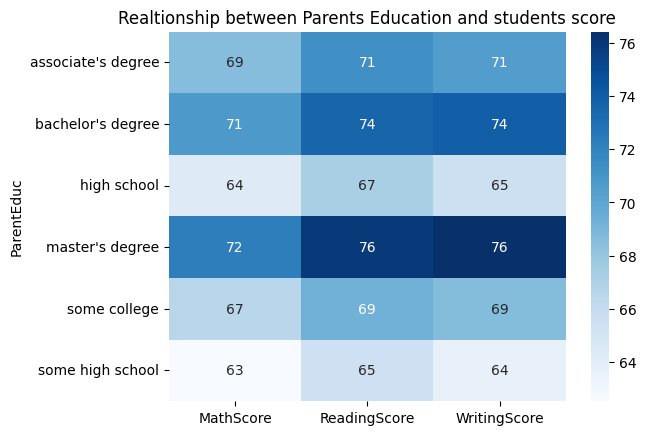

In [54]:
sns.heatmap(gb,cmap='Blues',annot=True)
plt.title("Realtionship between Parents Education and students score")
plt.show()

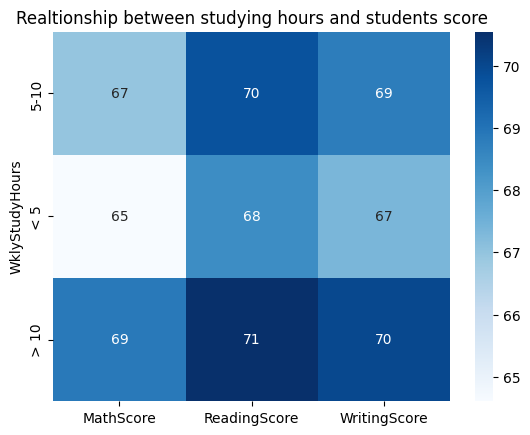

In [50]:
sns.heatmap(gb1,cmap='Blues',annot=True)
plt.title("Realtionship between studying hours and students score")
plt.show()

OUTLIERS

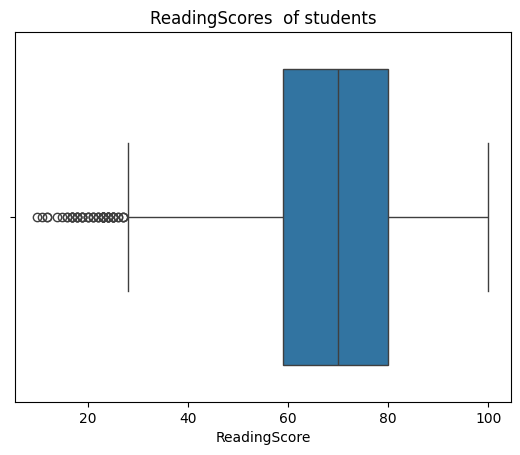

In [58]:
sns.boxplot(x='ReadingScore',data=df)
plt.title("ReadingScores  of students")
plt.show()

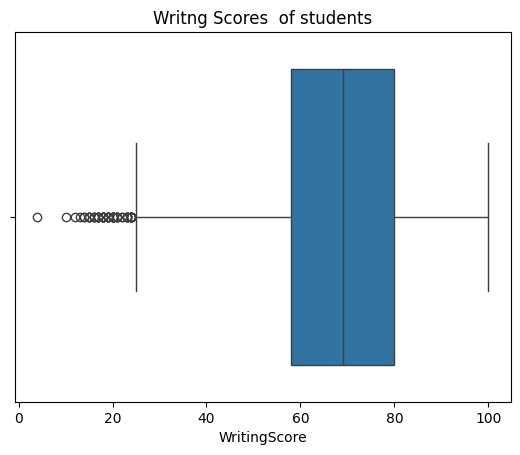

In [59]:
sns.boxplot(x='WritingScore',data=df)
plt.title("Writng Scores  of students")
plt.show()

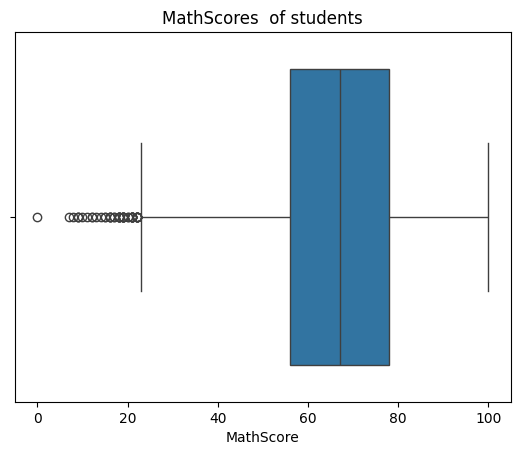

In [60]:
sns.boxplot(x='MathScore',data=df)
plt.title("MathScores  of students")
plt.show()

DISTRIBUTION OF ETHNIC GROUP

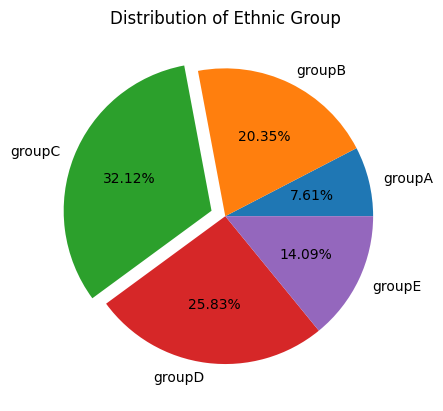

In [85]:
groupA=df[df["EthnicGroup"]=='group A'].count()
groupB=df[df["EthnicGroup"]=='group B'].count()
groupC=df[df["EthnicGroup"]=='group C'].count()
groupD=df[df["EthnicGroup"]=='group D'].count()
groupE=df[df["EthnicGroup"]=='group E'].count()

list=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD
["EthnicGroup"],groupE["EthnicGroup"]]

explodes=[0,0,0.1,0,0]

plt.title("Distribution of Ethnic Group")

plt.pie(list,autopct="%.2f%%",labels=['groupA','groupB','groupC','groupD','groupE'],explode=explodes)
plt.show()


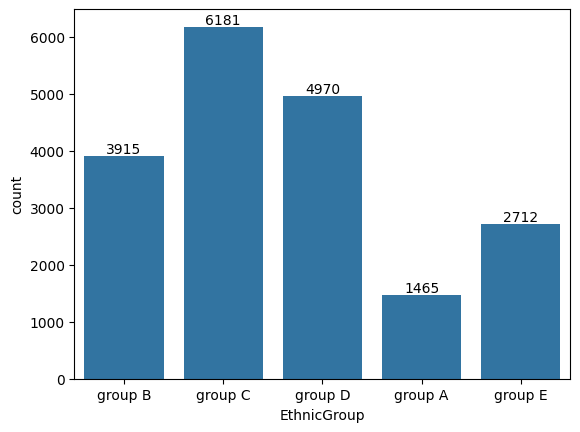

In [90]:
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()

In [15]:
df['total_score'] = df[['MathScore', 'ReadingScore', 'WritingScore']].sum(axis=1)



Does Test Preparation Help Improve Scores?


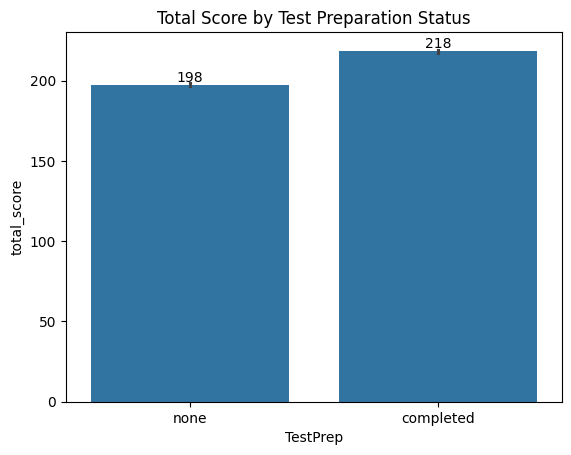

In [19]:
ax = sns.barplot(data=df, x="TestPrep", y="total_score")
plt.title("Total Score by Test Preparation Status")
ax.bar_label(ax.containers[0], fmt="%.0f")
plt.show()


Gender-Based Performance Comparison

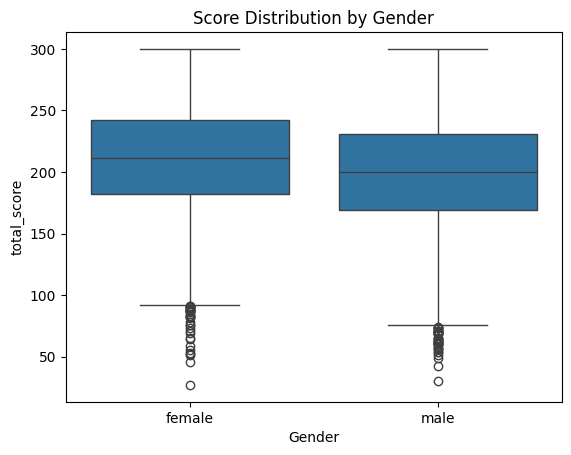

In [20]:
ax = sns.boxplot(data=df, x="Gender", y="total_score")
plt.title("Score Distribution by Gender")
plt.show()


 Does Being the First Child Affect Performance?

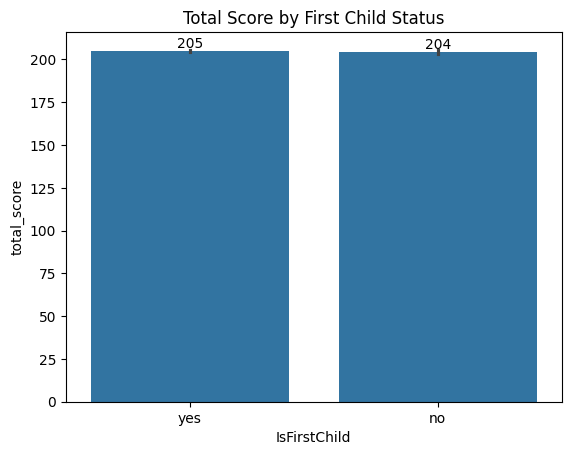

In [22]:
ax = sns.barplot(data=df, x="IsFirstChild", y="total_score")
plt.title("Total Score by First Child Status")
ax.bar_label(ax.containers[0], fmt="%.0f")
plt.show()


Transport Means Count

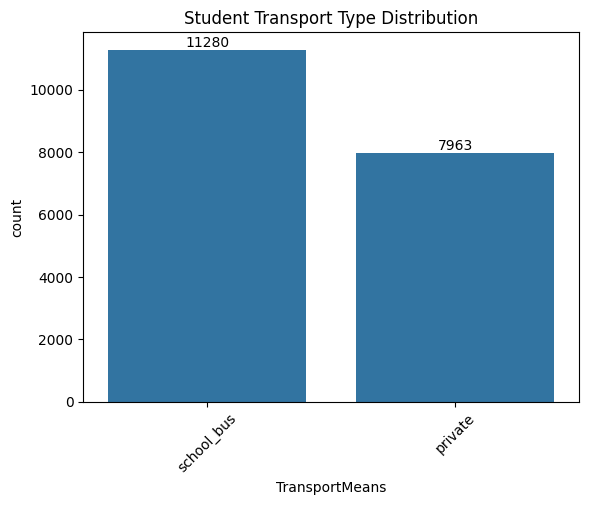

In [28]:
ax = sns.countplot(data=df, x="TransportMeans")
plt.title("Student Transport Type Distribution")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()


Test Preparation Completion Count

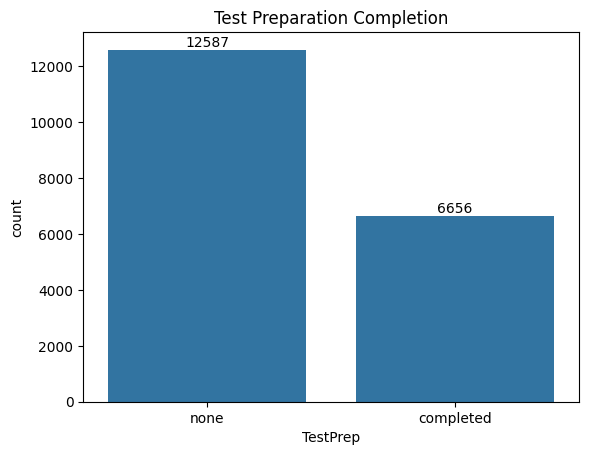

In [29]:
ax = sns.countplot(data=df, x="TestPrep")
plt.title("Test Preparation Completion")
ax.bar_label(ax.containers[0])
plt.show()